In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm import tqdm
import pandas as pd
mpl.style.use('default')
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "lightgray",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black",
    "legend.facecolor":'lightgray',
    "legend.edgecolor":'black',
    'axes.titlecolor': 'white'})


Datafolder = "../../../../datasets/Reverberating_Damped_Random_Walk/data/"
Modulesfolder = "../../../../Modules/"

import sys
sys.path.append(Modulesfolder)

FS = 18 # fontsize

# Dataset

## Read data

In [2]:
import pickle

with open(Datafolder+'times.pkl', 'rb') as f:
    time_arrays = pickle.load(f)

with open(Datafolder+'values.pkl', 'rb') as f:
    value_arrays = pickle.load(f)

with open(Datafolder+'labels.pkl', 'rb') as f:
  label_samples = pickle.load(f)

# Discard first three years to get evolution history (~407 samples)
time_arrays-=np.min(time_arrays,axis=-1,keepdims=True)

labels=np.zeros((len(label_samples),4))
labels[:,2:]=label_samples
# Mean
labels[:,0]=0.
# Structure function SF_inf^2
labels[:,1]=1.
label_samples=[]


def to_date(time_array,offset_date='2000-01-01T00:00:00'):
    return np.array([pd.Timedelta(x,'days').round('d')+pd.Timestamp(offset_date) for x in time_array])

In [3]:
from Modules.datasets.Reverberating_Damped_Random_Walk import Masking
from Modules.datasets.Reverberating_Damped_Random_Walk.Datasets import Dataset_Template,Year_Dataset


In [4]:
dataset = Dataset_Template(value_arrays,time_arrays,labels)

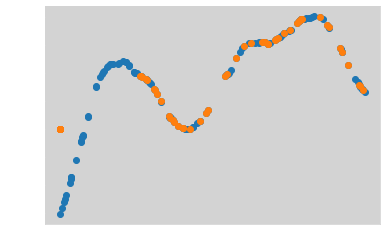

In [5]:
context,target,masks,out_labels,random_params = dataset.get_item(0,0,0)
plt.scatter(target[:,0],target[:,1])
plt.scatter(context[:,0],context[:,1])

In [11]:
out_labels

array([3.41187697, 3.33158703, 3.05829136, 1.94383131])

In [38]:
2.8 + 2 *0.52

3.84

In [39]:
2.8 - 2 *0.52

1.7599999999999998

In [41]:
1.22 - 3 * 0.44

-0.10000000000000009

In [43]:
np.log10(6*365)

3.3404441148401185

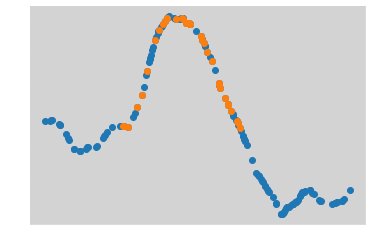

In [34]:
context,target,masks,out_labels,random_params, indices = dataset.collate_fn([dataset.__getitem__(0),dataset.__getitem__(3426)])
import torch
index=1
plt.scatter(target[index,target[index,:,2].type(torch.bool),0],target[index,target[index,:,2].type(torch.bool),1])
plt.scatter(context[index,context[index,:,2].type(torch.bool),0],context[index,context[index,:,2].type(torch.bool),1])

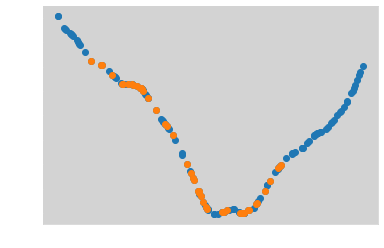

In [36]:

index=0
plt.scatter(target[index,target[index,:,2].type(torch.bool),0],target[index,target[index,:,2].type(torch.bool),1])
plt.scatter(context[index,context[index,:,2].type(torch.bool),0],context[index,context[index,:,2].type(torch.bool),1])

In [35]:
random_params

array([array([6, 0, 2, 1, 1]), array([3, 1, 1, 1, 1])], dtype=object)

In [6]:
labels_index, time_index, random_seed_index = 0,0,0
time_arrays, light_curves, padding_masks = dataset.get_full_light_curve(labels_index, time_index, random_seed_index)

In [7]:
year_index = 0
if year_index==0:
    time_prev = None
    value_prev = None
else:
    length = padding_masks[year_index-1,:].sum()
    # the last observed time and value
    time_prev = time_arrays[year_index-1,length-1]-1
    value_prev = light_curves[year_index-1,length-1]

if year_index==dataset.year_dataset.years_number-1:
    # first value from data not big enough to make the full year
    following_index = 1 + dataset.year_dataset.year_mask_indices[time_index,-1,-1]
    time_next =  dataset.year_dataset.get_time_array(time_index)[following_index]/365 - dataset.year_dataset.years_number + 1
    value_next = dataset.year_dataset.get_light_curve(labels_index,time_index,random_seed_index)[following_index]
else:
    # the first observed time and value
    time_next = time_arrays[year_index+1,0] + 1
    value_next = light_curves[year_index+1,0]

current_series = np.stack([time_arrays[year_index],light_curves[year_index],padding_masks[year_index]],axis=-1)
aug_series, aug_mask = dataset.augment_series_borders(current_series,time_prev,value_prev,time_next,value_next)

fig = plt.figure(figsize=(20,7))
plt.plot(dataset.year_dataset.get_time_array(time_index)/365 - year_index,dataset.year_dataset.get_light_curve(labels_index,time_index,random_seed_index))
plt.scatter(time_arrays[year_index,padding_masks[year_index]],light_curves[year_index,padding_masks[year_index]])
plt.scatter(aug_series[aug_mask,0],aug_series[aug_mask,1])


AttributeError: 'Dataset_Template' object has no attribute 'augment_series_borders'

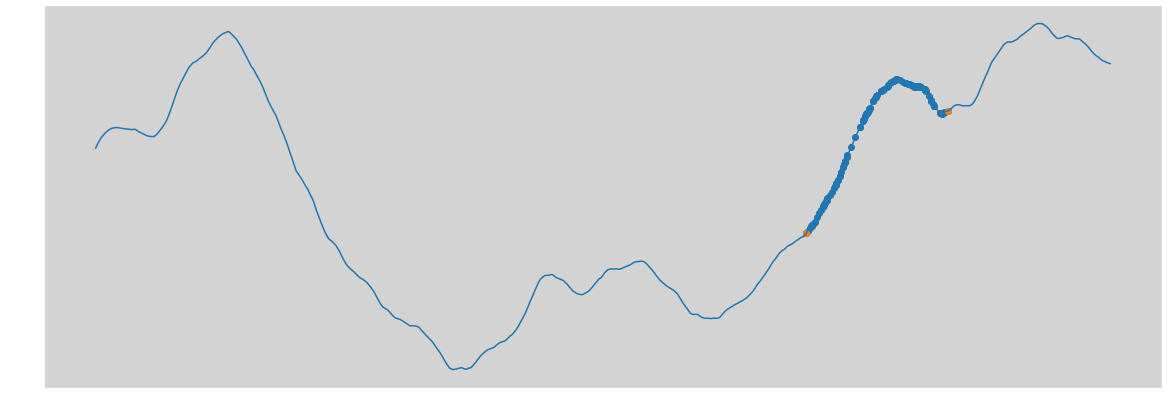

In [11]:
year_index = 5
if year_index==0:
    time_prev = None
    value_prev = None
else:
    length = padding_masks[year_index-1,:].sum()
    # the last observed time and value
    time_prev = time_arrays[year_index-1,length-1]-1
    value_prev = light_curves[year_index-1,length-1]

if year_index==dataset.year_dataset.years_number-1:
    # first value from data not big enough to make the full year
    following_index = 1 + dataset.year_dataset.year_mask_indices[time_index,-1,-1]
    time_next =  dataset.year_dataset.get_time_array(time_index)[following_index]/365 - dataset.year_dataset.years_number + 1
    value_next = dataset.year_dataset.get_light_curve(labels_index,time_index,random_seed_index)[following_index]
else:
    # the first observed time and value
    time_next = time_arrays[year_index+1,0] + 1
    value_next = light_curves[year_index+1,0]

current_series = np.stack([time_arrays[year_index],light_curves[year_index],padding_masks[year_index]],axis=-1)
aug_series, aug_mask = dataset.augment_series_borders(current_series,time_prev,value_prev,time_next,value_next)

fig = plt.figure(figsize=(20,7))
plt.plot(dataset.year_dataset.get_time_array(time_index)/365 - year_index,dataset.year_dataset.get_light_curve(labels_index,time_index,random_seed_index))
plt.scatter(time_arrays[year_index,padding_masks[year_index]],light_curves[year_index,padding_masks[year_index]])
plt.scatter(aug_series[aug_mask,0],aug_series[aug_mask,1])


In [12]:
aug_series

array([[ 0.0011821 , -0.04067835,  1.        ],
       [ 0.00217977, -0.04058506,  1.        ],
       [ 0.01090522, -0.03973096,  1.        ],
       [ 0.02868294, -0.03839936,  1.        ],
       [ 0.03616669, -0.03794086,  1.        ],
       [ 0.03993386, -0.03768459,  1.        ],
       [ 0.04145361, -0.03757042,  1.        ],
       [ 0.04459084, -0.03735313,  1.        ],
       [ 0.05299595, -0.03672259,  1.        ],
       [ 0.0601774 , -0.0361264 ,  1.        ],
       [ 0.07819629, -0.03413233,  1.        ],
       [ 0.09200698, -0.03252548,  1.        ],
       [ 0.10360725, -0.03154632,  1.        ],
       [ 0.12021135, -0.03006522,  1.        ],
       [ 0.12242662, -0.02982969,  1.        ],
       [ 0.12558607, -0.02953573,  1.        ],
       [ 0.12885911, -0.02918353,  1.        ],
       [ 0.13448928, -0.0285364 ,  1.        ],
       [ 0.14204598, -0.02770075,  1.        ],
       [ 0.14436021, -0.02744974,  1.        ],
       [ 0.14449482, -0.02743574,  1.   

In [14]:
q,p,r = np.stack(aug_series,1)

In [15]:
q

array([0.0011821 , 0.00217977, 0.01090522, 0.02868294, 0.03616669,
       0.03993386, 0.04145361, 0.04459084, 0.05299595, 0.0601774 ,
       0.07819629, 0.09200698, 0.10360725, 0.12021135, 0.12242662,
       0.12558607, 0.12885911, 0.13448928, 0.14204598, 0.14436021,
       0.14449482, 0.14798476, 0.15051169, 0.17003568, 0.18504682,
       0.19852856, 0.20577808, 0.20866873, 0.21412047, 0.22568634,
       0.22639742, 0.23745787, 0.2377459 , 0.24935624, 0.26064385,
       0.26100244, 0.26776003, 0.2725413 , 0.27381604, 0.27491613,
       0.28508016, 0.29082412, 0.31873159, 0.34634286, 0.38000977,
       0.38087458, 0.39994828, 0.40186929, 0.40606711, 0.41576826,
       0.41732771, 0.42304983, 0.42445784, 0.42521563, 0.42606446,
       0.429096  , 0.42912796, 0.43291653, 0.44039072, 0.44390882,
       0.4445232 , 0.44496663, 0.44719876, 0.44846932, 0.47144963,
       0.47257269, 0.48378591, 0.48982803, 0.4955973 , 0.50051241,
       0.52494477, 0.5280428 , 0.53866452, 0.54421481, 0.54766

In [15]:
aug_series

array([[ 0.00000000e+00, -6.83562961e-03,  1.00000000e+00],
       [ 3.26380700e-03, -6.42700310e-03,  1.00000000e+00],
       [ 6.47530122e-03, -6.02265606e-03,  1.00000000e+00],
       [ 1.59373498e-02, -4.89849172e-03,  1.00000000e+00],
       [ 1.77973210e-02, -4.69597046e-03,  1.00000000e+00],
       [ 1.90888602e-02, -4.57738899e-03,  1.00000000e+00],
       [ 2.31748186e-02, -4.15411536e-03,  1.00000000e+00],
       [ 2.56616600e-02, -3.88978109e-03,  1.00000000e+00],
       [ 3.81789632e-02, -2.70257264e-03,  1.00000000e+00],
       [ 4.00383466e-02, -2.59064882e-03,  1.00000000e+00],
       [ 4.48187408e-02, -2.33509710e-03,  1.00000000e+00],
       [ 6.43901469e-02, -1.03417285e-03,  1.00000000e+00],
       [ 7.12745007e-02, -5.71957337e-04,  1.00000000e+00],
       [ 8.51072713e-02,  7.52961068e-05,  1.00000000e+00],
       [ 1.04401187e-01,  8.14727832e-04,  1.00000000e+00],
       [ 1.13917341e-01,  9.95082274e-04,  1.00000000e+00],
       [ 1.22154035e-01,  1.14863894e-03

(-0.1, -0.04)

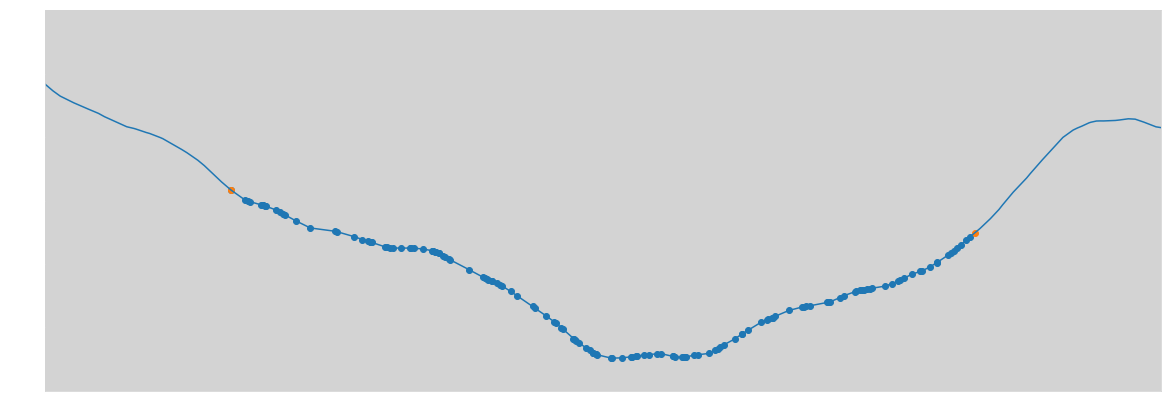

In [11]:
aug_series[padding_masks[year_index].sum()-1:,0]

array([0.99294751, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [12]:
aug_series[padding_masks[year_index].sum()-1:,1]

array([-0.07576714, -0.06833557, -0.04906367,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [16]:
aug_series[:3,1]

array([-0.06835313, -0.06987535, -0.07010474])

In [13]:
aug_series[padding_masks[year_index].sum()-1:,0]

array([0.99294751, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [14]:
aug_mask[padding_masks[year_index].sum()-1:]

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

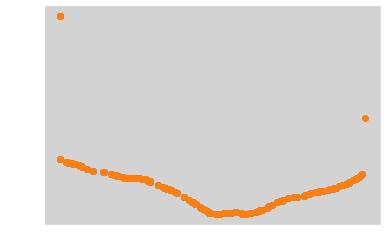

In [11]:
plt.scatter(time_arrays[year_index,padding_masks[year_index]],light_curves[year_index,padding_masks[year_index]])
plt.scatter(aug_series[:,0],aug_series[:,1])


In [12]:
value_next

0.033690288337698375

In [26]:
time_prev

-0.005285736107634831

In [ ]:
val

In [24]:
padding_masks

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

845

In [12]:
light_curves[-1]

array([-0.04067835, -0.04058506, -0.03973096, -0.03839936, -0.03794086,
       -0.03768459, -0.03757042, -0.03735313, -0.03672259, -0.0361264 ,
       -0.03413233, -0.03252548, -0.03154632, -0.03006522, -0.02982969,
       -0.02953573, -0.02918353, -0.0285364 , -0.02770075, -0.02744974,
       -0.02743574, -0.02703913, -0.02678637, -0.02550263, -0.02418526,
       -0.02273637, -0.02190112, -0.02153303, -0.02083332, -0.01944033,
       -0.01934066, -0.01791443, -0.01790377, -0.01623377, -0.01434458,
       -0.01426312, -0.01311587, -0.01238117, -0.01219083, -0.01202613,
       -0.01040922, -0.0096212 , -0.00638342, -0.00254459,  0.00150522,
        0.00158827,  0.00399794,  0.0042681 ,  0.00479416,  0.00589906,
        0.00609219,  0.00667665,  0.00681424,  0.00687929,  0.00697112,
        0.00729106,  0.00729298,  0.00763799,  0.00840771,  0.00876914,
        0.00881745,  0.00886843,  0.00909295,  0.00922497,  0.01172514,
        0.01185798,  0.01296157,  0.01352964,  0.01405043,  0.01

In [13]:
following_index = 1 + dataset.year_dataset.year_mask_indices[time_index,-1,-1]

In [14]:
following_index

846

In [16]:
dataset.year_dataset.get_light_curve(labels_index,time_index,random_seed_index)[following_index]

0.008130376962268263

In [ ]:
dataset.year_dataset.get_light_curve(labels_index,time_index,random_seed_index)[following_index]

1.005139114586103

In [19]:
time_arrays[-1]

array([0.0011821 , 0.00217977, 0.01090522, 0.02868294, 0.03616669,
       0.03993386, 0.04145361, 0.04459084, 0.05299595, 0.0601774 ,
       0.07819629, 0.09200698, 0.10360725, 0.12021135, 0.12242662,
       0.12558607, 0.12885911, 0.13448928, 0.14204598, 0.14436021,
       0.14449482, 0.14798476, 0.15051169, 0.17003568, 0.18504682,
       0.19852856, 0.20577808, 0.20866873, 0.21412047, 0.22568634,
       0.22639742, 0.23745787, 0.2377459 , 0.24935624, 0.26064385,
       0.26100244, 0.26776003, 0.2725413 , 0.27381604, 0.27491613,
       0.28508016, 0.29082412, 0.31873159, 0.34634286, 0.38000977,
       0.38087458, 0.39994828, 0.40186929, 0.40606711, 0.41576826,
       0.41732771, 0.42304983, 0.42445784, 0.42521563, 0.42606446,
       0.429096  , 0.42912796, 0.43291653, 0.44039072, 0.44390882,
       0.4445232 , 0.44496663, 0.44719876, 0.44846932, 0.47144963,
       0.47257269, 0.48378591, 0.48982803, 0.4955973 , 0.50051241,
       0.52494477, 0.5280428 , 0.53866452, 0.54421481, 0.54766

In [4]:
year_dataset = Year_Dataset(value_arrays,time_arrays,labels)

In [5]:
year_dataset.seasons_lengths('pixel').max()

163

In [6]:
year_dataset.output_padding_length

165

In [ ]:
def augment_series(time_arrays,value_arrays,padding_masks,start_values,end_values):
    return

In [10]:
time_arrays, light_curves, padding_masks, _ = year_dataset.get_item(0, 0, 0)

In [13]:
time_arrays

array([[0.00000000e+00, 3.26380700e-03, 6.47530122e-03, 1.59373498e-02,
        1.77973210e-02, 1.90888602e-02, 2.31748186e-02, 2.56616600e-02,
        3.81789632e-02, 4.00383466e-02, 4.48187408e-02, 6.43901469e-02,
        7.12745007e-02, 8.51072713e-02, 1.04401187e-01, 1.13917341e-01,
        1.22154035e-01, 1.45722144e-01, 1.81236731e-01, 1.85354229e-01,
        1.85857697e-01, 1.88230528e-01, 1.89362672e-01, 1.93064060e-01,
        1.94028068e-01, 2.00374908e-01, 2.03680218e-01, 2.19142387e-01,
        2.42674054e-01, 2.48096034e-01, 2.50296995e-01, 2.56441194e-01,
        2.71994003e-01, 2.75570108e-01, 2.81071045e-01, 2.83242123e-01,
        2.87405032e-01, 2.90923427e-01, 2.92879378e-01, 2.97707798e-01,
        3.00253112e-01, 3.03450813e-01, 3.08549294e-01, 3.18060782e-01,
        3.20839730e-01, 3.38504888e-01, 3.52085796e-01, 3.52427684e-01,
        3.54431455e-01, 3.58478272e-01, 3.59235230e-01, 3.62169758e-01,
        3.71398859e-01, 3.79214224e-01, 3.85884626e-01, 3.943757

In [14]:
year_index = 2

In [15]:
time = time_arrays[year_index]
light = light_curves[year_index]
mask = padding_masks[year_index]

In [20]:
obs_length = mask.sum()

In [37]:
time_next = time_arrays[year_index+1,0]+1
value_next = light_curves[year_index+1,0]
pseudo_end = (1-time[obs_length-1])/(time_next-time[obs_length-1])
value_end = pseudo_end * value_next + (1-pseudo_end) * light[obs_length-1]

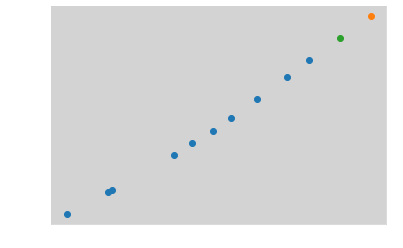

In [40]:
plt.scatter(time[mask][-10:],light[mask][-10:])
plt.scatter(time_next,value_next)
plt.scatter(1,value_end)

In [39]:
time_next

1.0067544815428913

In [41]:
length

NameError: name 'length' is not defined

In [43]:
time[obs_length-1]

0.9929475122757245

In [45]:
from copy import deepcopy
q = deepcopy(mask)

In [46]:
q[obs_length]=1

In [47]:
q

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [48]:
q[obs_length]

True

In [ ]:
pseudo_end = (1-)

145

In [16]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [18]:
np.where(~mask)[0][0]

145

In [37]:
year_dataset.get_labels(1)

array([  0.        ,   1.        , 534.69061752,   9.88524772])

In [49]:
year_dataset.years_number

6

In [52]:
np.array([*(72,25),*(0,np.inf)]) / 365

array([0.19726027, 0.06849315, 0.        ,        inf])

In [39]:
rng = np.random.default_rng(42)

[1581.4885762    2.6786829]


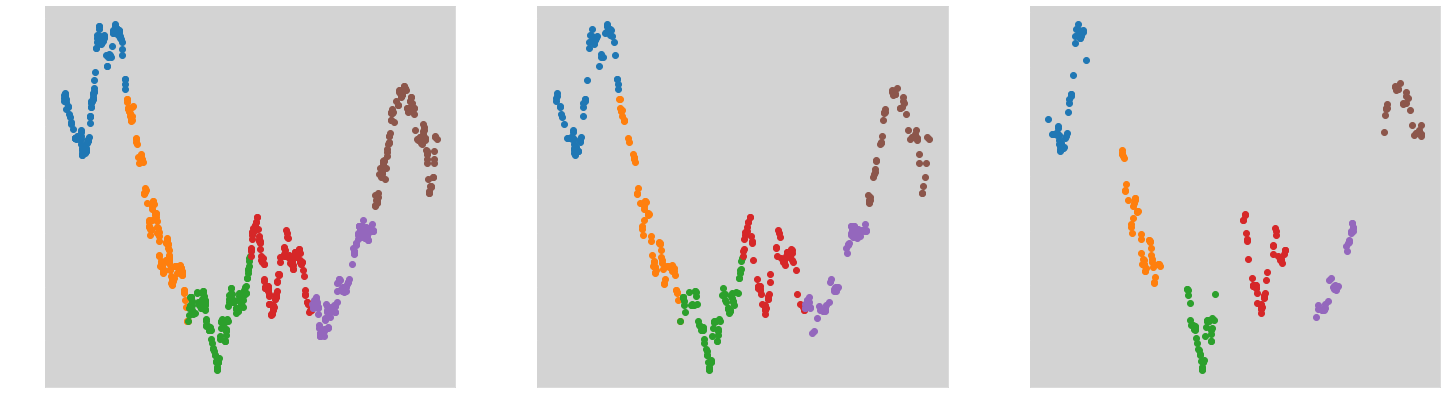

In [48]:
t,x,m,l = year_dataset.get_item(7,0,0)
print(l[2:])

simulated_Poisson_scale = 2.5
observed_Poisson_scale = 5
m_subsampling = Masking.Poisson_process_subsampling_mask(1/simulated_Poisson_scale,1/observed_Poisson_scale, m.shape,rng)

gap_sampler = Masking.get_truncnorm_sampler(72/365,25/365,0,np.inf,rng)
start_gap_mask,end_gap_mask = Masking.sample_border_masks(t,gap_sampler)
m_gaps = start_gap_mask | end_gap_mask

fig,ax = plt.subplots(1,3,figsize=(25,7))

for i,(time,value,mask,mask_subsampling,mask_gaps) in enumerate(zip(t,x,m,m_subsampling,m_gaps)):
    ax[0].scatter(time[mask]+i,value[mask])
    ax[1].scatter(time[mask & mask_subsampling]+i,value[mask & mask_subsampling])
    ax[2].scatter(time[mask & mask_subsampling & ~mask_gaps]+i,value[mask & mask_subsampling & ~mask_gaps])

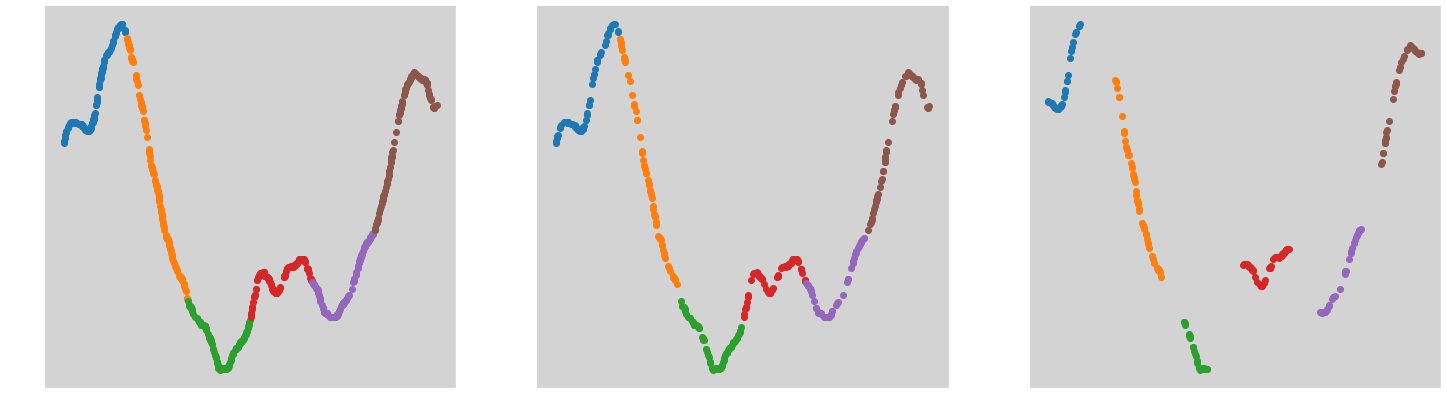

In [35]:
(m & m_subsampling & ~m_gaps).sum(-1)

array([36, 57, 30, 55, 36, 40])

In [ ]:
for i,(time,value,mask,mask_subsampling) in enumerate(zip(t,x,m)):
    plt.scatter(time[mask]+i,value[mask])

In [3]:
from Modules.datasets.Oversampled_RDRW.Year_Dataset import Year_Dataset
from Modules.datasets.Oversampled_RDRW.Observation_schedule import Observation_schedule
from Modules.datasets.Oversampled_RDRW.Light_curves_Dataset import Single_Year_LC_Dataset

In [4]:
year_dataset = Year_Dataset(Light_curves,time_arrays,labels)
obs_schedule = Observation_schedule()

In [5]:
dataset = Single_Year_LC_Dataset(light_curves = Light_curves, time_arrays = time_arrays, labels = labels,)

In [6]:
dataset.shape

(500, 5, 50, 85)

In [7]:
context,target = dataset[0]

In [10]:
context.shape

(85, 3)

In [11]:
context_mask = context[:,-1].astype(bool)

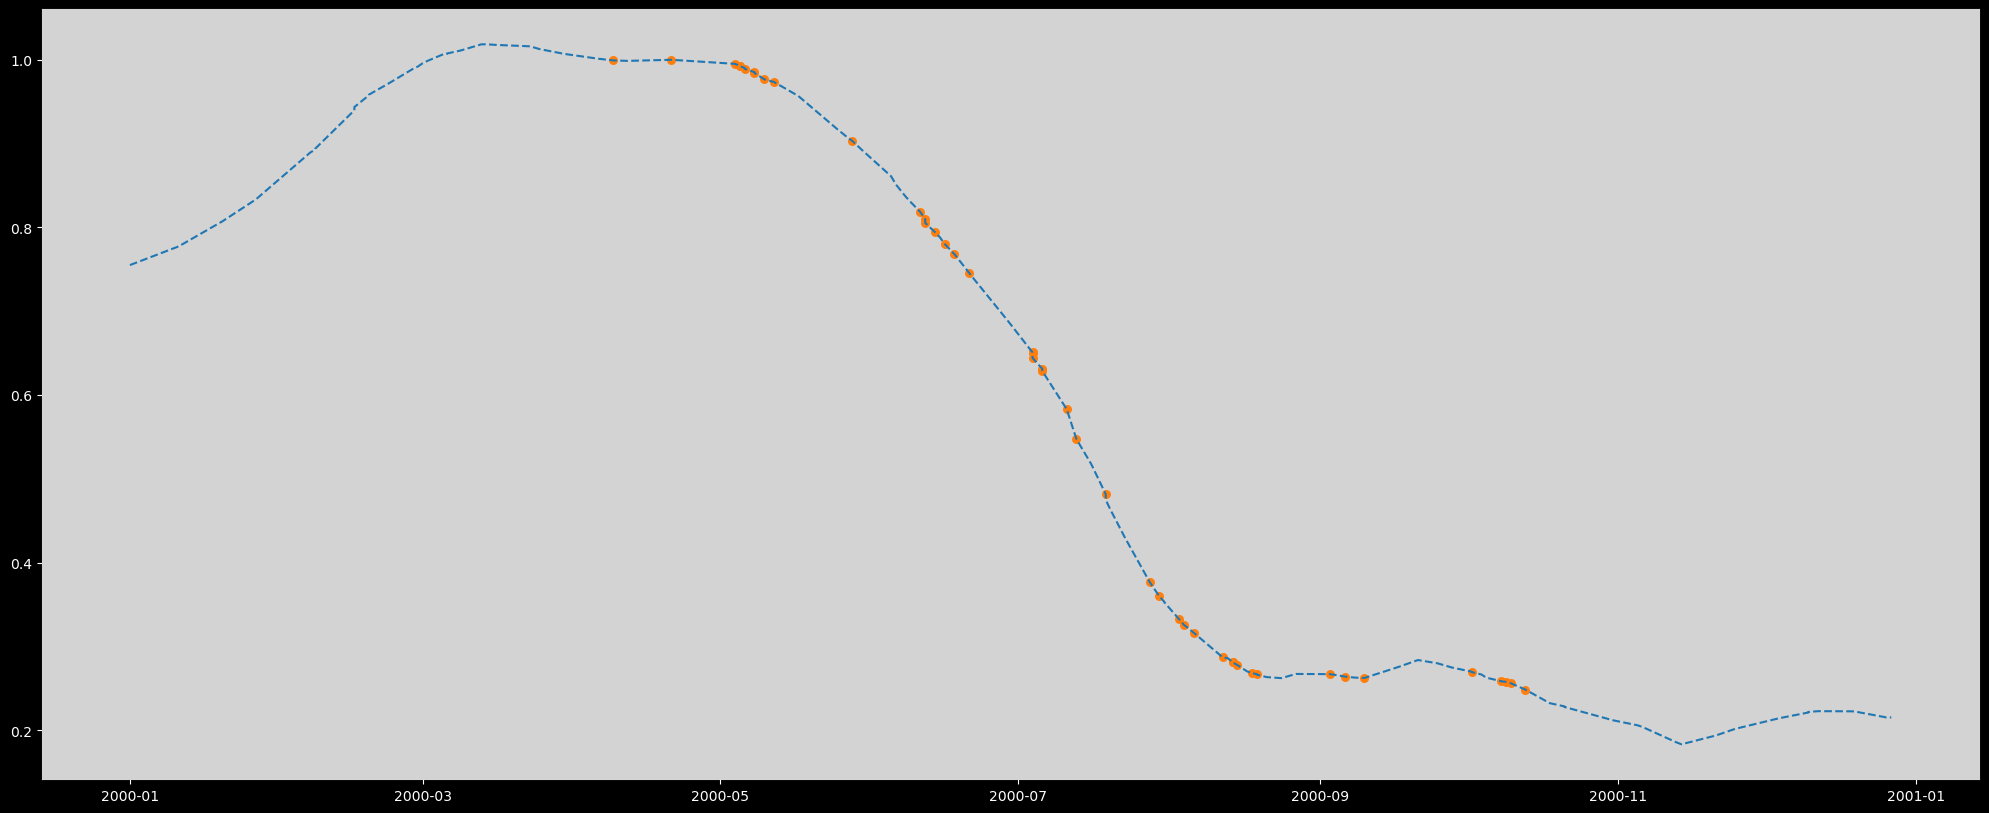

In [16]:
plt.figure(figsize=(25,10))

context,target = dataset.get_item(0,0,0)
context_mask = context[:,-1].astype(bool)
target_mask = target[:,-1].astype(bool)

plt.plot(to_date(target[target_mask,0]*365),target[target_mask,1],color='C0',linestyle='--')
plt.scatter(to_date(context[context_mask,0]*365),context[context_mask,1],color='C1',s=30)

In [20]:
dataset.shape

(500, 5, 50, 85)

In [21]:
500*50*5

125000

In [8]:
context.shape

(85, 3)

In [9]:
target.shape

(165, 3)

In [13]:
year_dataset.shape[:3]

(500, 5, 50)

In [10]:
obs_times.shape

(85,)

In [13]:
np.stack([obs_times, obs_lights, obs_masks],axis=1)

array([[ 0.14002514, -0.88067177,  1.        ],
       [ 0.14705383, -0.86187675,  1.        ],
       [ 0.16115098, -0.82259564,  1.        ],
       [ 0.16619569, -0.80872795,  1.        ],
       [ 0.16876865, -0.80131402,  1.        ],
       [ 0.1860362 , -0.75956728,  1.        ],
       [ 0.18998592, -0.75307311,  1.        ],
       [ 0.20701651, -0.73988542,  1.        ],
       [ 0.25883997, -0.74441044,  1.        ],
       [ 0.29529941, -0.77683346,  1.        ],
       [ 0.30638784, -0.79272354,  1.        ],
       [ 0.32480756, -0.81729321,  1.        ],
       [ 0.32714664, -0.82032142,  1.        ],
       [ 0.33120003, -0.82451914,  1.        ],
       [ 0.34588937, -0.84468124,  1.        ],
       [ 0.35837846, -0.85014555,  1.        ],
       [ 0.35938425, -0.84965708,  1.        ],
       [ 0.38699811, -0.82863097,  1.        ],
       [ 0.38772382, -0.82830177,  1.        ],
       [ 0.40194706, -0.82901521,  1.        ],
       [ 0.4099434 , -0.82965248,  1.   

In [14]:
obs_lights

array([-0.88067177, -0.86187675, -0.82259564, -0.80872795, -0.80131402,
       -0.75956728, -0.75307311, -0.73988542, -0.74441044, -0.77683346,
       -0.79272354, -0.81729321, -0.82032142, -0.82451914, -0.84468124,
       -0.85014555, -0.84965708, -0.82863097, -0.82830177, -0.82901521,
       -0.82965248, -0.82096769, -0.80786008, -0.80630714, -0.80629052,
       -0.80430786, -0.79979629, -0.78877569, -0.78180757, -0.76164527,
       -0.69986056, -0.68037631, -0.65018453, -0.64868315, -0.62303116,
       -0.61594895, -0.61055932, -0.60667501, -0.58449572, -0.56630496,
       -0.54833844, -0.52110325, -0.51497735, -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

In [6]:
time_arrays,light_curves,padding_masks,label = year_dataset.get_item(0,1,2)

In [7]:
downsampling_masks,gaps_masks = obs_schedule.sample_observation_schedule(time_arrays,padding_masks)

In [8]:
gaps_masks

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

In [9]:
(dataset.seasons_lengths('pixel').max()/2)

82.5

In [10]:
obs_times,obs_lights,obs_masks = obs_schedule.apply_observations_masks(time_arrays,light_curves,padding_masks)

In [37]:
dataset.shape

(500, 5, 50, 6)

In [11]:
obs_times

array([[0.23494364, 0.24983176, 0.25762602, 0.27080736, 0.27629904,
        0.28417047, 0.30551425, 0.31040598, 0.32707538, 0.33080955,
        0.33583571, 0.35387817, 0.3724333 , 0.40190842, 0.40426054,
        0.40599262, 0.40981789, 0.44241088, 0.45102879, 0.47700013,
        0.5154879 , 0.52688862, 0.53294924, 0.55799749, 0.57356906,
        0.57987157, 0.58053148, 0.58098558, 0.58818382, 0.61305564,
        0.63849842, 0.64829646, 0.66670004, 0.67847294, 0.68603633,
        0.69483301, 0.69907994, 0.70318648, 0.70418128, 0.70425482,
        0.71379233, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [12]:
obs_lights

array([[-13.77859553, -13.31279169, -13.02297429, -12.57227839,
        -12.40565122, -12.15725577, -11.37210472, -11.18256133,
        -10.49564624, -10.34441604, -10.11787951,  -9.32747582,
         -8.65478816,  -7.26133049,  -7.12394872,  -7.02434242,
         -6.78929875,  -4.79748238,  -4.27204902,  -2.75923882,
         -0.86100001,  -0.26661078,   0.05675647,   1.15941423,
          1.87044444,   2.14656221,   2.17375011,   2.19155996,
          2.44855596,   3.54777204,   4.35681049,   4.66146148,
          5.12008504,   5.38881601,   5.57504074,   5.79548129,
          5.90067663,   6.00181872,   6.03107135,   6.03319873,
          6.31849437,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.

In [18]:
obs_masks.sum(axis=-1)

array([43, 51, 58, 47, 57, 49])

In [55]:
(np.random.randint(low=2, high=6,size=100) ==6).any()

False

In [40]:
length

4

In [57]:
time_arrays.shape

(6, 165)

In [35]:
from Modules.datasets.Oversampled_RDRW.Utils import Normalise
normalize_class = Normalise(1,-1)

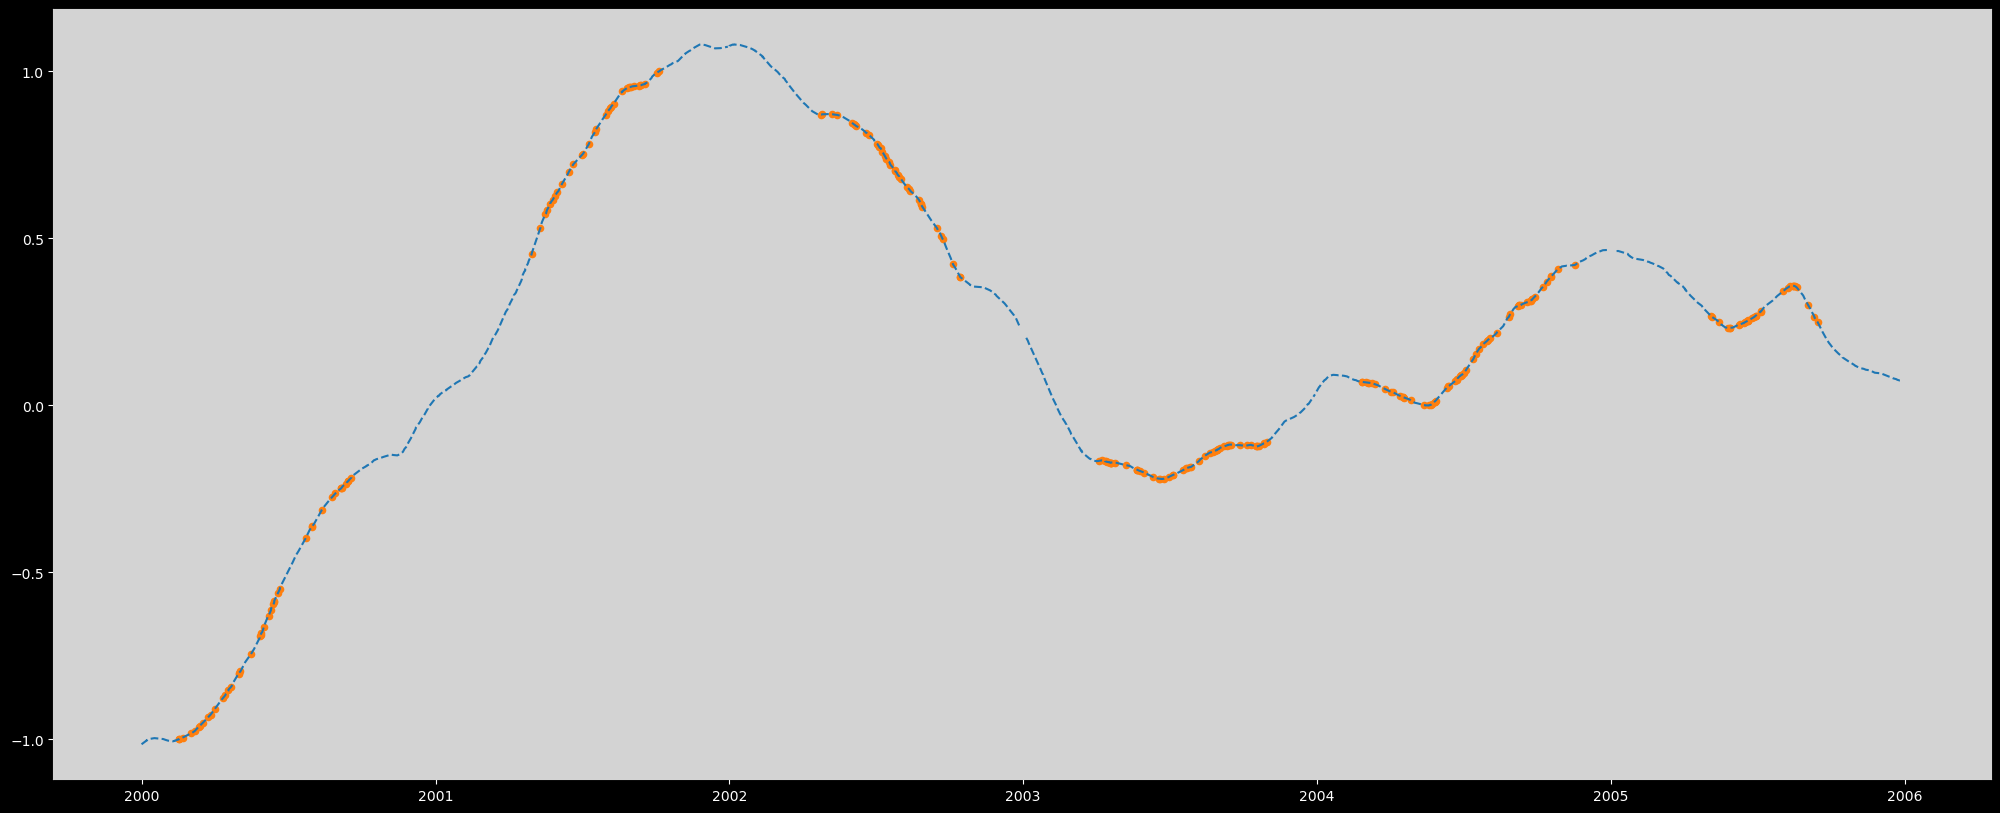

In [36]:
plt.figure(figsize=(25,10))

time_arrays,light_curves,padding_masks,label = dataset.get_item(0,1,2)

years_num = 6
time_arrays,light_curves,padding_masks = time_arrays[:years_num],light_curves[:years_num],padding_masks[:years_num]

obs_times,obs_lights,obs_masks = obs_schedule.apply_observations_masks(time_arrays,light_curves,padding_masks)

concat_light = obs_lights[obs_masks]
light_bounds = (np.max(concat_light),np.min(concat_light))
light_normalisation = normalize_class.light_curve_normalisation(*light_bounds)

light_curves = normalize_class.normalise_light_curve(light_curves,*light_normalisation)
obs_lights = normalize_class.normalise_light_curve(obs_lights,*light_normalisation)

for year, (time,light,pad_mask,obs_time,obs_light,obs_mask) in enumerate(zip(time_arrays,light_curves,padding_masks,
                                                                             obs_times,obs_lights,obs_masks)):

    concat_light = obs_lights[obs_masks]
    light_bounds = (np.max(concat_light),np.min(concat_light))
    light_normalisation = normalize_class.light_curve_normalisation(*light_bounds)

    pad_mask = pad_mask.astype(bool)
    cont_time = (time[pad_mask]+year)*365
    cont_light = normalize_class.normalise_light_curve(light,*light_normalisation)[pad_mask]

    obs_time = (obs_time[obs_mask]+year)*365
    obs_light = obs_light[obs_mask]

    plt.plot(to_date(cont_time),cont_light,color='C0',linestyle='--')
    plt.scatter(to_date(obs_time),obs_light,color='C1',s=20)

array([-13.31279169, -13.30580145, -12.57227839, -12.15725577,
       -10.49564624, -10.11787951,  -9.32747582,  -8.65478816,
        -7.26133049,  -7.15977729,  -7.02434242,  -6.78929875,
        -5.48919966,  -5.4076311 ,  -4.27204902,  -3.43502977,
         0.05675647,   1.87044444,   2.44855596,   3.54777204,
         4.35681049,   5.12008504,   5.29014613,   5.39120232,
         5.46575161,   5.57504074,   5.79548129,   6.03319873,
         6.38885495,   7.04129873,   7.26254126,   7.32617121,
         7.36194048,   7.57567769,   7.78339946,   7.87332889,
         7.9484355 ,  18.16271791,  18.70334559,  18.81527745,
        19.29164827,  21.06345138,  22.10653281,  23.16917699,
        23.50707361,  23.85736137,  23.99388783,  24.29550798,
        24.57897728,  24.62084388,  27.51030081,  27.59969803,
        28.64023908,  28.71944308,  29.84333033,  30.20320948,
        30.51803003,  30.57245036,  31.24106265,  32.56488066,
        32.89342271,  33.7048384 ,  35.21870589,  35.63

In [28]:
concat_light = obs_lights[obs_masks]
light_bounds = (np.max(concat_light),np.min(concat_light))
light_normalisation = normalize_class.light_curve_normalisation(*light_bounds)

In [31]:
q = normalize_class.normalise_light_curve(obs_lights,*light_normalisation)
p = normalize_class.normalise_light_curve(light_curves,*light_normalisation)

In [32]:
q

array([[-1.        , -0.9997453 , -0.97301874, -0.95789702, -0.89735479,
        -0.88359052, -0.85479146, -0.83028148, -0.77950961, -0.77580943,
        -0.77087474, -0.76231071, -0.71494044, -0.71196842, -0.67059247,
        -0.64009493, -0.51286858, -0.44678524, -0.42572123, -0.38567031,
        -0.35619227, -0.32838168, -0.32218535, -0.31850328, -0.31578701,
        -0.31180496, -0.30377301, -0.29511157, -0.28215292, -0.25838054,
        -0.25031937, -0.24800096, -0.24669768, -0.23890997, -0.23134144,
        -0.22806478, -0.22532821, -0.51493655, -0.51493655, -0.51493655,
        -0.51493655, -0.51493655, -0.51493655, -0.51493655, -0.51493655,
        -0.51493655, -0.51493655, -0.51493655, -0.51493655, -0.51493655,
        -0.51493655, -0.51493655, -0.51493655, -0.51493655, -0.51493655,
        -0.51493655, -0.51493655, -0.51493655, -0.51493655, -0.51493655,
        -0.51493655, -0.51493655, -0.51493655, -0.51493655, -0.51493655,
        -0.51493655, -0.51493655, -0.51493655, -0.5

In [33]:
p

array([[-1.10895604e+00, -1.09784234e+00, -1.09729706e+00,
        -1.09653472e+00, -1.09566346e+00, -1.09251150e+00,
        -1.08992595e+00, -1.09280100e+00, -1.09550069e+00,
        -1.09774846e+00, -1.09980120e+00, -1.09911979e+00,
        -1.09843730e+00, -1.09786709e+00, -1.09739900e+00,
        -1.09383143e+00, -1.09344705e+00, -1.09290696e+00,
        -1.08803178e+00, -1.08721448e+00, -1.07474106e+00,
        -1.07324914e+00, -1.07006487e+00, -1.06832274e+00,
        -1.05473274e+00, -1.05150213e+00, -1.04790319e+00,
        -1.04301016e+00, -1.02475965e+00, -1.02461481e+00,
        -1.01697198e+00, -1.00000000e+00, -9.99745304e-01,
        -9.93316679e-01, -9.89440245e-01, -9.73018737e-01,
        -9.66947527e-01, -9.57897017e-01, -9.52892460e-01,
        -9.43646076e-01, -9.40394018e-01, -9.40322645e-01,
        -9.32473781e-01, -9.29289338e-01, -9.22383155e-01,
        -8.97354791e-01, -8.91844583e-01, -8.88750255e-01,
        -8.83590522e-01, -8.54791459e-01, -8.30281483e-0

In [ ]:
light_bounds = (np.max(concat_light),np.min(concat_light))

In [9]:
normalize_class()

(6, 165)

In [10]:
gaps_masks

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

In [25]:
obs_masks = downsampling_masks & ~gaps_masks

In [26]:
obs_masks.sum(axis=1)

array([45, 49, 55, 41, 54, 51])

In [28]:
round(dataset.seasons_lengths('pixel').max()/2)

82

In [30]:
gaps_masks

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

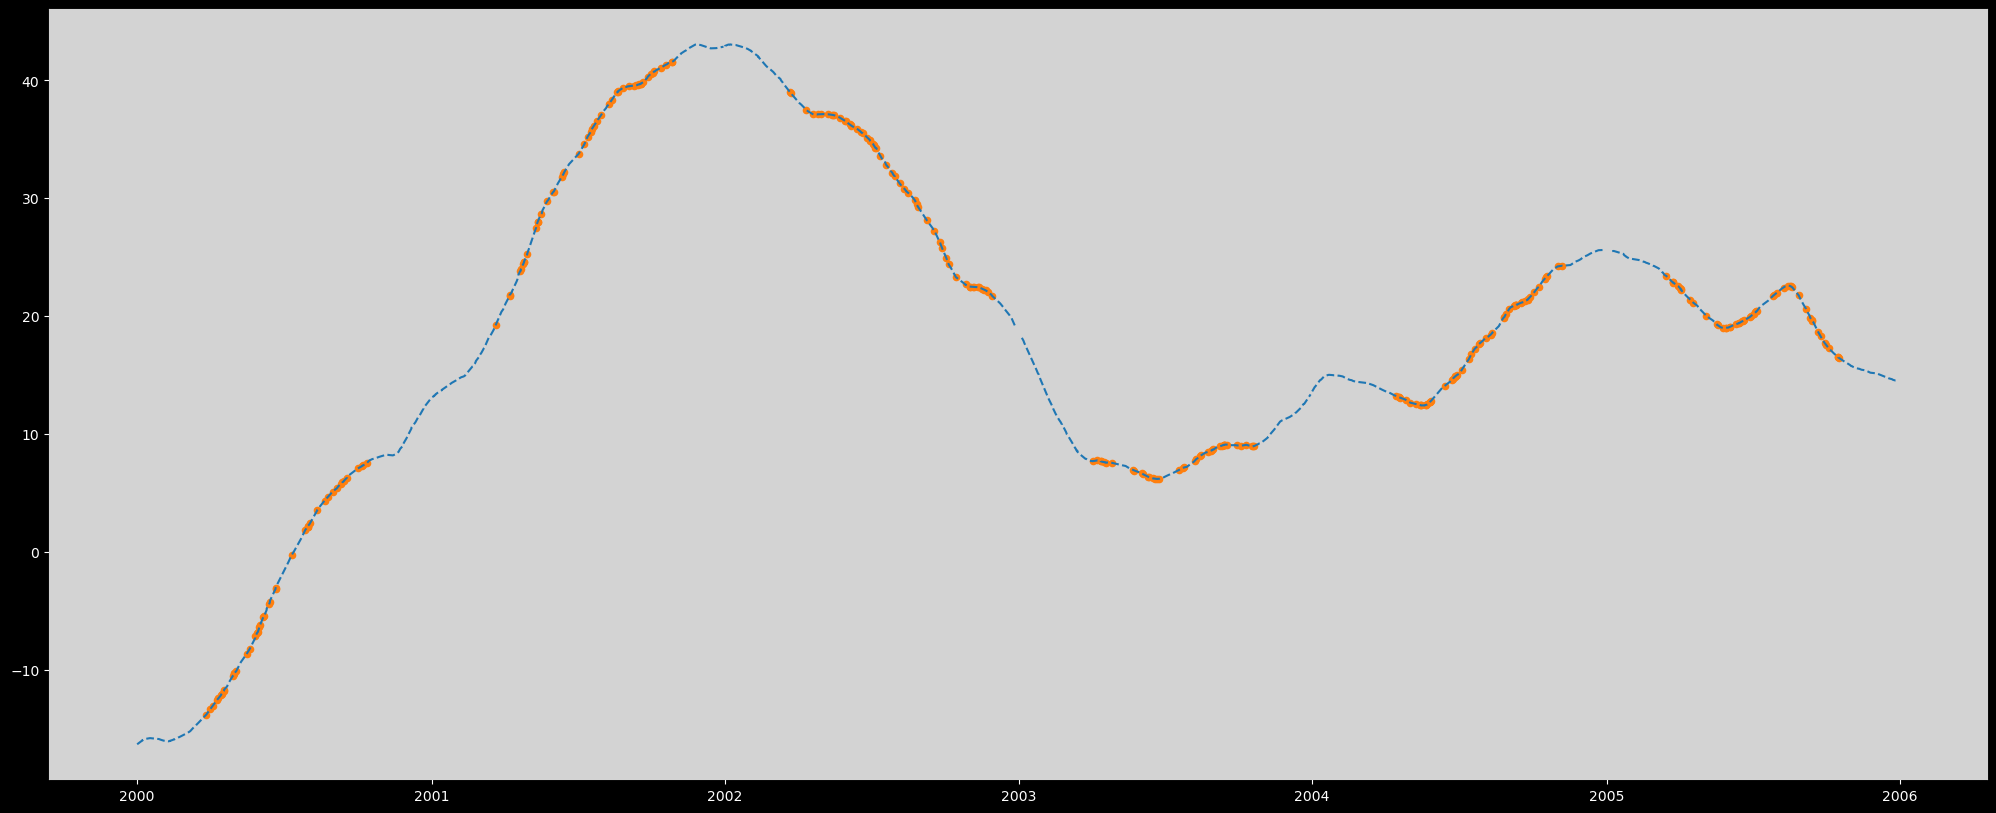

In [21]:
plt.figure(figsize=(25,10))

time_arrays,light_curves,padding_masks,label = dataset.get_item(0,1,2)
downsampling_masks,gaps_masks = obs_schedule.sample_observation_schedule(time_arrays,padding_masks)
for year, (time,light,pad_mask,down_mask,gap_mask) in enumerate(zip(time_arrays,light_curves,padding_masks,downsampling_masks,gaps_masks)):
    pad_mask = pad_mask.astype(bool)
    cont_time = (time[pad_mask]+year)*365
    cont_light = light[pad_mask]

    obs_mask = (down_mask & ~gap_mask).astype(bool)
    obs_time = (time[obs_mask]+year)*365
    obs_light = light[obs_mask]

    plt.plot(to_date(cont_time),cont_light,color='C0',linestyle='--')
    plt.scatter(to_date(obs_time),obs_light,color='C1',s=20)

In [24]:
dataset.seasons_lengths('pixel').max()/2

82.5

In [16]:
length = padding_masks[0].sum()
obs_points = np.sort(
                np.random.choice(np.arange(length,dtype=int), size=round(length/2), replace=False)
            )

In [17]:
np.arange(length,dtype=int)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145])

In [18]:
obs_points

array([  3,   6,   7,   8,  10,  13,  15,  16,  17,  22,  23,  25,  26,
        27,  28,  31,  32,  35,  36,  37,  46,  47,  48,  49,  50,  52,
        59,  60,  62,  63,  70,  71,  72,  75,  76,  78,  79,  81,  82,
        84,  87,  88,  96,  97, 100, 101, 103, 104, 105, 108, 109, 110,
       112, 114, 115, 116, 117, 119, 120, 121, 122, 123, 125, 126, 127,
       130, 131, 135, 140, 141, 143, 144, 145])

In [11]:
length = padding_masks[0].sum()

In [19]:
round(147/2)

74

In [17]:
length

146.0

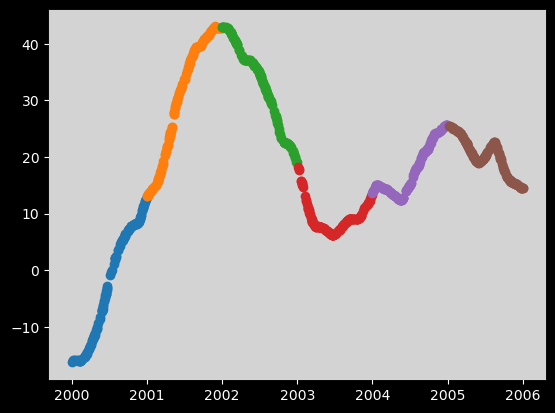

In [9]:
time_arrays,light_curves,padding_masks,label = dataset.get_item(0,1,2)
for year, (time,light,mask) in enumerate(zip(time_arrays,light_curves,padding_masks)):
    mask = mask.astype(bool)
    day_time = (time[mask]+year)*365
    plt.scatter(to_date(day_time),light[mask])

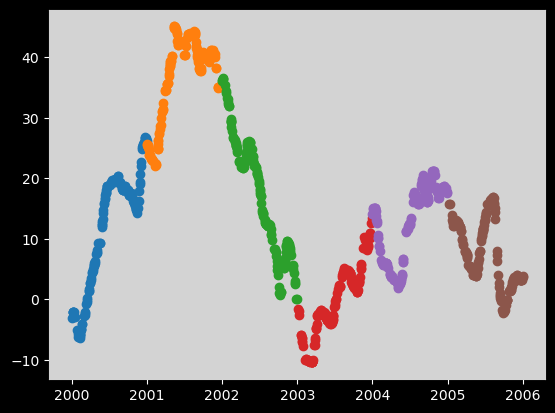

In [12]:
time_arrays,light_curves,padding_masks,label = dataset.get_item(1,1,2)
for year, (time,light,mask) in enumerate(zip(time_arrays,light_curves,padding_masks)):
    mask = mask.astype(bool)
    day_time = (time[mask]+year)*365
    plt.scatter(to_date(day_time),light[mask])

In [14]:
def get_season_bounds_sampler(mean,std,lower_limit,upper_limit,rng):
    normalised_limits = (lower_limit - mean) / std , (upper_limit - mean) / std

    def sampler(size):
        return stats.truncnorm.rvs(*normalised_limits, size=size, loc=mean, scale=std,random_state=rng)

    return sampler


In [15]:
from scipy import stats

In [16]:
season_gap_params = (72, 25); season_gap_bounds = (0, np.inf); random_seed=42
rng = np.random.default_rng(random_seed)
_season_gap_sampler = get_season_bounds_sampler(*season_gap_params, *season_gap_bounds, rng)

In [17]:
gaps_lengths = _season_gap_sampler(2)


In [18]:
gaps_lengths


array([90.83585731, 68.22539947])

In [21]:
time_arrays,light_curves,padding_masks,label = dataset.get_item(0,0,0)

In [22]:
time_arrays


array([[0.        , 0.02843192, 0.05175807, 0.06756473, 0.06992744,
        0.10236725, 0.10429434, 0.10504623, 0.12529689, 0.1270823 ,
        0.13494377, 0.13534764, 0.14415971, 0.15849787, 0.16063415,
        0.16383477, 0.16698408, 0.17626294, 0.1780869 , 0.17935343,
        0.18336028, 0.18579898, 0.19807393, 0.19989732, 0.20458516,
        0.22377764, 0.23052871, 0.24409366, 0.26301403, 0.27234594,
        0.28042316, 0.30353497, 0.33836196, 0.34239974, 0.34289346,
        0.34522035, 0.34633057, 0.3499603 , 0.35090564, 0.3571296 ,
        0.36037092, 0.37553372, 0.39860979, 0.4039268 , 0.40608515,
        0.41211039, 0.42736208, 0.43086895, 0.43626338, 0.43839243,
        0.44247474, 0.44592501, 0.44784309, 0.45257803, 0.45507406,
        0.45820985, 0.46320962, 0.47253696, 0.47526211, 0.49258525,
        0.50590322, 0.50623849, 0.50820346, 0.51217193, 0.51291423,
        0.51579194, 0.52484236, 0.53250641, 0.53904767, 0.54737435,
        0.54891461, 0.55172281, 0.55929764, 0.57

In [32]:
gaps_lengths = _season_gap_sampler(2*dataset.years_number).reshape(2,dataset.years_number)
season_borders = np.array([gaps_lengths[0],365-gaps_lengths[1]])

In [35]:
season_borders.T

array([[ 80.65771769, 312.63185807],
       [ 75.42388986, 298.70761585],
       [ 75.7795308 , 266.68971681],
       [ 59.27200357, 311.02435437],
       [ 25.95251493, 331.83261524],
       [ 68.08863852, 307.36264629]])

In [59]:
time_arrays.shape

(6, 165)

In [47]:
q = time_arrays[:,:,None] - season_borders.T[:,None,:]/365

In [49]:
time_arrays[0]

array([0.        , 0.02843192, 0.05175807, 0.06756473, 0.06992744,
       0.10236725, 0.10429434, 0.10504623, 0.12529689, 0.1270823 ,
       0.13494377, 0.13534764, 0.14415971, 0.15849787, 0.16063415,
       0.16383477, 0.16698408, 0.17626294, 0.1780869 , 0.17935343,
       0.18336028, 0.18579898, 0.19807393, 0.19989732, 0.20458516,
       0.22377764, 0.23052871, 0.24409366, 0.26301403, 0.27234594,
       0.28042316, 0.30353497, 0.33836196, 0.34239974, 0.34289346,
       0.34522035, 0.34633057, 0.3499603 , 0.35090564, 0.3571296 ,
       0.36037092, 0.37553372, 0.39860979, 0.4039268 , 0.40608515,
       0.41211039, 0.42736208, 0.43086895, 0.43626338, 0.43839243,
       0.44247474, 0.44592501, 0.44784309, 0.45257803, 0.45507406,
       0.45820985, 0.46320962, 0.47253696, 0.47526211, 0.49258525,
       0.50590322, 0.50623849, 0.50820346, 0.51217193, 0.51291423,
       0.51579194, 0.52484236, 0.53250641, 0.53904767, 0.54737435,
       0.54891461, 0.55172281, 0.55929764, 0.57349613, 0.57876

In [52]:
season_borders.T[0]/365

array([0.22098005, 0.85652564])

In [54]:
(time_arrays[0]>season_borders.T[0,0]/365) & (time_arrays[0]<season_borders.T[0,1]/365)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False,

In [58]:
season_masks = (time_arrays>season_borders.T[:,None,0]/365) & (time_arrays<season_borders.T[:,None,1]/365)

In [64]:
season_masks

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False, False, False, False, False, False,
      

In [63]:
np.where(padding_masks)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
padding_masks

In [62]:
dataset.seasons_lengths('pixel').mean()/2

72.5

In [38]:
season_borders.T.shape

(6, 2)

In [ ]:
season_borders

In [21]:
season_borders = np.array([gaps_lengths[0],365-gaps_lengths[1]])


In [22]:
season_borders

array([ 98.88242163, 280.03574339])

In [23]:
def _closest_indices(array, time_array):
        return np.argmin(np.abs(time_array[:, None] - array), axis=0)

In [24]:
idx = _closest_indices(season_borders/365,time_arrays[0])
idx

array([ 29, 108])

In [28]:
dataset.seasons_lengths('pixel').max()


165

In [31]:
time_arrays[0][:1]


array([0.])